# The programm build tree by prufer code

Enter your prufer code separated by space:

3 3 4 5 5 5 5 5 5 


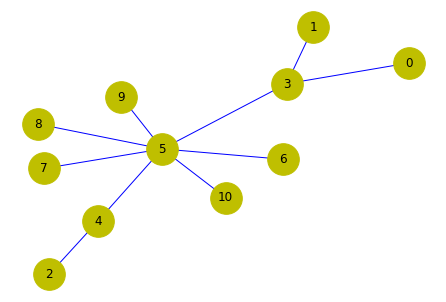

In [7]:
import networkx as nx
from networkx import *
import pylab as py
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def correct_prufer_code(prufer_code):
    for i in prufer_code:
        if i < 0 or i > number_of_vertices - 1:
            return False
    return True

def build_graph_by_prufer(prufer_code, graph, number_of_vertices):
    degree = [1] * number_of_vertices
    for i in range(number_of_vertices - 2):
        degree[prufer_code[i]] += 1
 
    leaf_candidate = 0
    while leaf_candidate < number_of_vertices and degree[leaf_candidate] != 1:
        leaf_candidate += 1
    leaf = leaf_candidate
 
    for i in range(number_of_vertices - 2):
        vertex = prufer_code[i]
        graph.add_edge(leaf, vertex)
 
        degree[leaf] -= 1
        degree[vertex] -= 1
        if degree[vertex] == 1 and vertex < leaf_candidate:
            leaf = vertex
        else:
            leaf_candidate += 1
            while leaf_candidate < number_of_vertices and degree[leaf_candidate] != 1:
                leaf_candidate += 1
            leaf = leaf_candidate
    for vertex in range(number_of_vertices - 1):
        if degree[vertex] == 1:
            graph.add_edge(vertex, number_of_vertices - 1)

print("Enter your prufer code separated by space:\n")
prufer_code = list(map(int, input().split()))
number_of_vertices = len(prufer_code) + 2
if(not correct_prufer_code(prufer_code)):
    print("You entered incorrect prufer code")
else:
    graph = nx.Graph()
    build_graph_by_prufer(prufer_code, graph, number_of_vertices)
    nx.draw(graph, node_size=1000, node_color='y', edge_color= 'b', with_labels = True)
    graph.clear()